In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1
def max_element(arr):
    """
    Находит максимальный элемент среди элементов, перед которыми стоит нулевой
    """
    # Находим индексы, где элементы равны 0
    zero_indices = np.where(arr == 0)[0]
    
    # Берем элементы, следующие за нулевыми (если они существуют)
    candidates = []
    for idx in zero_indices:
        if idx + 1 < len(arr):
            candidates.append(arr[idx + 1])
    
    if len(candidates) == 0:
        return None
    
    return np.max(candidates)

# Проверка
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(f"Максимальный элемент после нуля: {max_element(x)}")

Максимальный элемент после нуля: 5


In [3]:
#2
def nearest_value(X, v):
    """
    Находит ближайший к v элемент матрицы X
    """
    # Вычисляем абсолютную разницу и находим минимальный элемент
    diff = np.abs(X - v)
    return X.flat[np.argmin(diff)]

# Проверка
X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(f"Ближайший элемент к {v}: {nearest_value(X, v)}")

Ближайший элемент к 3.6: 4


In [4]:
#3
def scale(X):
    """
    Масштабирует каждый столбец матрицы (вычитает среднее, делит на стандартное отклонение)
    """
    # Вычисляем среднее и стандартное отклонение по столбцам
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Избегаем деления на ноль
    std[std == 0] = 1
    
    # Масштабируем
    return (X - mean) / std

# Проверка
test_matrix = np.random.randint(0, 100, (5, 3))
print("Исходная матрица:")
print(test_matrix)
print("Масштабированная матрица:")
print(scale(test_matrix))

Исходная матрица:
[[58 72 71]
 [22 10 51]
 [24 36 50]
 [ 8 41 97]
 [82 17 13]]
Масштабированная матрица:
[[ 0.70726028  1.6957265   0.52854163]
 [-0.61885275 -1.16120402 -0.195488  ]
 [-0.5451798   0.03686362 -0.23168948]
 [-1.13456337  0.26726124  1.46978016]
 [ 1.59133564 -0.83864735 -1.57114431]]


In [5]:
#4
def get_stats(X):
    """
    Вычисляет различные статистики для матрицы
    """
    stats = {}
    
    # Определитель (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['determinant'] = np.linalg.det(X)
    else:
        stats['determinant'] = "Матрица не квадратная"
    
    # След (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['trace'] = np.trace(X)
    else:
        stats['trace'] = "Матрица не квадратная"
    
    # Минимальный и максимальный элементы
    stats['min'] = np.min(X)
    stats['max'] = np.max(X)
    
    # Норма Фробениуса
    stats['frobenius_norm'] = np.linalg.norm(X, 'fro')
    
    # Собственные числа (только для квадратных матриц)
    if X.shape[0] == X.shape[1]:
        stats['eigenvalues'] = np.linalg.eigvals(X)
    else:
        stats['eigenvalues'] = "Матрица не квадратная"
    
    # Обратная матрица (только для квадратных невырожденных)
    if X.shape[0] == X.shape[1] and np.linalg.det(X) != 0:
        stats['inverse'] = np.linalg.inv(X)
    else:
        stats['inverse'] = "Обратная матрица не существует"
    
    return stats

# Проверка
test_matrix = np.random.normal(10, 1, (3, 3))
stats = get_stats(test_matrix)
for key, value in stats.items():
    print(f"{key}: {value}")

determinant: 36.99624677192245
trace: 30.702761075314534
min: 8.491661066516556
max: 10.4159617950833
frobenius_norm: 28.31693216258836
eigenvalues: [28.22440278  1.7132842   0.7650741 ]
inverse: [[ 0.39600243 -0.08303804 -0.25611059]
 [-0.21160531  0.74319971 -0.47317947]
 [-0.156301   -0.6410495   0.78696546]]


In [6]:
#5
# Эксперимент с перемножением матриц
max_elements = []
for exp_num in range(100):
    # Генерируем две матрицы 10x10 из стандартного нормального распределения
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    
    # Перемножаем матрицы
    C = np.dot(A, B)
    
    # Находим максимальный элемент
    max_elements.append(np.max(C))

max_elements = np.array(max_elements)
print(f"Среднее значение максимальных элементов: {np.mean(max_elements)}")
print(f"95-процентная квантиль: {np.percentile(max_elements, 95)}")

Среднее значение максимальных элементов: 8.043278215850671
95-процентная квантиль: 11.381859400529653


In [7]:
#Часть 2 Pandas
# Загрузка данных (предполагается, что файл 2008.csv в текущей директории)
df = pd.read_csv('2008.csv')
print(f"Размер данных: {df.shape}")
print(f"Первые 5 строк:")
df.head()

Размер данных: (70000, 29)
Первые 5 строк:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
#6
# Анализ причин отмены рейсов
cancellation_counts = df['CancellationCode'].value_counts()
print("Распределение кодов отмены:")
print(cancellation_counts)

# Расшифровка кодов
code_explanation = {
    'A': 'Carrier',
    'B': 'Weather', 
    'C': 'NAS',
    'D': 'Security'
}

most_common_code = cancellation_counts.index[0]
print(f"\nСамая частая причина отмены: {most_common_code} - {code_explanation.get(most_common_code, 'Unknown')}")

Распределение кодов отмены:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены: A - Carrier


In [9]:
#7
# Статистики по расстоянию
distance_stats = {
    'mean': df['Distance'].mean(),
    'min': df['Distance'].min(),
    'max': df['Distance'].max()
}

print("Статистики расстояния:")
for stat, value in distance_stats.items():
    print(f"{stat}: {value}")

Статистики расстояния:
mean: 724.5082571428571
min: 31
max: 4962


In [10]:
#8
# Анализ подозрительно малых расстояний
min_distance = df['Distance'].min()
suspicious_flights = df[df['Distance'] == min_distance]

print(f"Рейсы с минимальным расстоянием ({min_distance} миль):")
print(f"Количество: {len(suspicious_flights)}")
print("\nИнформация о рейсах:")
print(suspicious_flights[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Distance']])

# Анализ этих же рейсов в другие дни
if len(suspicious_flights) > 0:
    carrier = suspicious_flights.iloc[0]['UniqueCarrier']
    flight_num = suspicious_flights.iloc[0]['FlightNum']
    origin = suspicious_flights.iloc[0]['Origin']
    dest = suspicious_flights.iloc[0]['Dest']
    
    same_flights = df[
        (df['UniqueCarrier'] == carrier) & 
        (df['FlightNum'] == flight_num) &
        (df['Origin'] == origin) & 
        (df['Dest'] == dest)
    ]
    
    print(f"\nСтатистика расстояния для рейса {carrier}{flight_num} ({origin}-{dest}):")
    print(f"Минимальное: {same_flights['Distance'].min()}")
    print(f"Максимальное: {same_flights['Distance'].max()}")
    print(f"Среднее: {same_flights['Distance'].mean()}")
    print(f"Количество записей: {len(same_flights)}")

Рейсы с минимальным расстоянием (31 миль):
Количество: 6

Информация о рейсах:
       Year  Month  DayofMonth UniqueCarrier  FlightNum Origin Dest  Distance
1116   2008     12          30            AS         65    WRG  PSG        31
6958   2008     12          26            AS         65    WRG  PSG        31
17349  2008      8          18            AS         64    PSG  WRG        31
27534  2008      3          11            AS         64    PSG  WRG        31
46082  2008      8           9            AS         65    WRG  PSG        31
48112  2008      2          28            AS         64    PSG  WRG        31

Статистика расстояния для рейса AS65 (WRG-PSG):
Минимальное: 31
Максимальное: 31
Среднее: 31.0
Количество записей: 3


In [11]:
#9
# Анализ аэропортов по количеству вылетов
departure_counts = df['Origin'].value_counts()
busiest_airport = departure_counts.index[0]
busiest_count = departure_counts.iloc[0]

print(f"Аэропорт с наибольшим количеством вылетов: {busiest_airport}")
print(f"Количество вылетов: {busiest_count}")

# Для определения города нужна дополнительная информация об аэропортах
# В реальном сценарии можно использовать внешний датасет с информацией об аэропортах

Аэропорт с наибольшим количеством вылетов: ATL
Количество вылетов: 4134


In [12]:
#10
# Среднее время полета по аэропортам вылета
airtime_by_origin = df.groupby('Origin')['AirTime'].mean()
airport_max_airtime = airtime_by_origin.idxmax()
max_airtime = airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полета: {airport_max_airtime}")
print(f"Среднее время полета: {max_airtime:.2f} минут")

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут


In [13]:
#11
# Анализ доли задержанных рейсов по аэропортам
delayed_stats = df.groupby('Origin').agg({
    'DepDelay': [
        ('total_flights', 'count'),
        ('delayed_flights', lambda x: (x > 0).sum()),
        ('delay_ratio', lambda x: (x > 0).mean())
    ]
}).round(4)

# Выравнивание колонок
delayed_stats.columns = ['total_flights', 'delayed_flights', 'delay_ratio']

# Фильтрация аэропортов с >= 1000 рейсов
filtered_airports = delayed_stats[delayed_stats['total_flights'] >= 1000]

# Аэропорт с наибольшей долей задержек
max_delay_airport = filtered_airports['delay_ratio'].idxmax()
max_delay_ratio = filtered_airports['delay_ratio'].max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport}")
print(f"Доля задержанных рейсов: {max_delay_ratio:.4f}")
print(f"Общее количество рейсов: {filtered_airports.loc[max_delay_airport, 'total_flights']}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 0.5112
Общее количество рейсов: 1343


In [14]:
#Часть 3 линейная регрессия
#12
# Загрузка данных для регрессии
df_reg = pd.read_csv('2008.csv')

# Анализ пропущенных значений
print("Анализ пропущенных значений:")
print(f"Всего пропущенных элементов: {df_reg.isnull().sum().sum()}")
print(f"Объектов с хотя бы одним пропуском: {df_reg.isnull().any(axis=1).sum()}")
print(f"Признаков с хотя бы одним пропуском: {df_reg.isnull().any(axis=0).sum()}")

# Анализ пропусков в целевой переменной
print(f"\nПропуски в целевой переменной (DepDelay): {df_reg['DepDelay'].isnull().sum()}")

# Анализ объектов с пропущенной целевой переменной
null_target = df_reg[df_reg['DepDelay'].isnull()]
print(f"\nОбъекты с пропущенной DepDelay:")
print(f"Количество: {len(null_target)}")
print("Распределение по Cancelled:")
print(null_target['Cancelled'].value_counts())
print("Распределение по Diverted:")
print(null_target['Diverted'].value_counts())

# Исключение объектов с пропущенной или нулевой целевой переменной
df_clean = df_reg[df_reg['DepDelay'].notna() & (df_reg['DepDelay'] != 0)].copy()

# Выделение целевой переменной и признаков
y = df_clean['DepDelay']
X = df_clean.drop('DepDelay', axis=1)

print(f"\nРазмер после очистки: {X.shape}")

Анализ пропущенных значений:
Всего пропущенных элементов: 355215
Объектов с хотя бы одним пропуском: 70000
Признаков с хотя бы одним пропуском: 16

Пропуски в целевой переменной (DepDelay): 1399

Объекты с пропущенной DepDelay:
Количество: 1399
Распределение по Cancelled:
Cancelled
1    1399
Name: count, dtype: int64
Распределение по Diverted:
Diverted
0    1399
Name: count, dtype: int64

Размер после очистки: (63404, 28)


In [15]:
#13
# Функция для преобразования времени
def convert_time_columns(df, time_columns):
    """
    Преобразует временные колонки формата hhmm в отдельные колонки часов и минут
    """
    df_new = df.copy()
    
    for col in time_columns:
        if col in df_new.columns:
            # Заполняем пропуски и преобразуем в строку
            temp_series = df_new[col].fillna(-1).astype(int).astype(str)
            
            # Для корректной обработки добавляем ведущие нули
            temp_series = temp_series.str.zfill(4)
            
            # Извлекаем часы и минуты
            df_new[f'{col}_Hour'] = temp_series.str[:2].replace('-1', np.nan).astype('float64')
            df_new[f'{col}_Minute'] = temp_series.str[2:].replace('-1', np.nan).astype('float64')
            
            # Удаляем исходную колонку
            df_new.drop(col, axis=1, inplace=True)
    
    return df_new

# Применяем преобразование
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
X = convert_time_columns(X, time_columns)

print(f"Размер после преобразования времени: {X.shape}")
print(f"Новые колонки: {[col for col in X.columns if 'Hour' in col or 'Minute' in col]}")

Размер после преобразования времени: (63404, 32)
Новые колонки: ['DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


In [16]:
#14
# Исключаем признаки, сильно коррелирующие с ответом
# и указанные в задании
columns_to_drop = [
    'TailNum', 'Year',  # По условию задания
    'ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime'  # Содержат информацию о задержке прибытия
]

# Проверяем, какие из этих колонок существуют в данных
existing_columns = [col for col in columns_to_drop if col in X.columns]
X = X.drop(existing_columns, axis=1)

print(f"Исключены колонки: {existing_columns}")
print(f"Размер после исключения: {X.shape}")

Исключены колонки: ['TailNum', 'Year', 'ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime']
Размер после исключения: (63404, 27)


Анализ распределения признаков:
DepTime_Hour:
count    63404.000000
mean        13.062788
std          4.791933
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         24.000000
Name: DepTime_Hour, dtype: float64

TaxiIn:
count    63264.000000
mean         6.862718
std          4.884281
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        165.000000
Name: TaxiIn, dtype: float64

FlightNum:
count    63404.000000
mean      2172.564333
std       1946.933041
min          1.000000
25%        600.000000
50%       1528.000000
75%       3395.000000
max       7828.000000
Name: FlightNum, dtype: float64


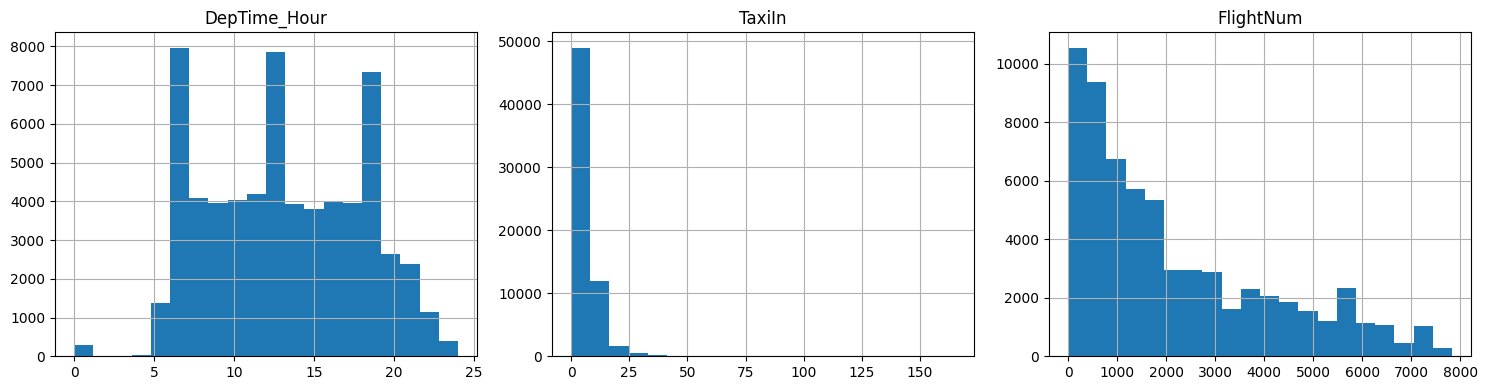

In [17]:
#15
# Анализ распределения признаков
print("Анализ распределения признаков:")
print("DepTime_Hour:")
print(X['DepTime_Hour'].describe())
print("\nTaxiIn:")
print(X['TaxiIn'].describe())
print("\nFlightNum:")
print(X['FlightNum'].describe())

# Построим гистограммы
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

X['DepTime_Hour'].hist(bins=20, ax=axes[0])
axes[0].set_title('DepTime_Hour')

X['TaxiIn'].hist(bins=20, ax=axes[1])
axes[1].set_title('TaxiIn')

X['FlightNum'].hist(bins=20, ax=axes[2])
axes[2].set_title('FlightNum')

plt.tight_layout()
plt.show()

In [18]:
def transform_data(data):
    """
    Преобразует данные для обучения линейных моделей
    """
    data = data.copy()
    
    # Определяем типы признаков
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Вещественные признаки: {len(numeric_features)}")
    print(f"Категориальные признаки: {len(categorical_features)}")
    
    # 1. Замена пропущенных значений
    # Для вещественных признаков - на 0
    for col in numeric_features:
        data[col] = data[col].fillna(0)
    
    # Для категориальных признаков - на 'nan'
    for col in categorical_features:
        data[col] = data[col].fillna('nan')
    
    # 2. Масштабирование вещественных признаков
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(data[numeric_features])
    data_numeric = pd.DataFrame(scaled_numeric, columns=numeric_features, index=data.index)
    
    # 3. One-hot-кодирование категориальных признаков
    data_categorical = pd.get_dummies(data[categorical_features], prefix_sep='_')
    
    # Объединяем результаты
    transformed_data = pd.concat([data_numeric, data_categorical], axis=1)
    
    return transformed_data

# Применяем преобразование
X_transformed = transform_data(X)
print(f"Размер данных после преобразования: {X_transformed.shape}")

Вещественные признаки: 23
Категориальные признаки: 4
Размер данных после преобразования: (63404, 640)


In [19]:
#16
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, shuffle=True
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Целевая переменная обучающая: {y_train.shape}")
print(f"Целевая переменная тестовая: {y_test.shape}")

Обучающая выборка: (44382, 640)
Тестовая выборка: (19022, 640)
Целевая переменная обучающая: (44382,)
Целевая переменная тестовая: (19022,)


In [20]:
#17
# Берем первые 1000 объектов для обучения
X_train_1000 = X_train.iloc[:1000]
y_train_1000 = y_train.iloc[:1000]

# Обучаем линейную регрессию
lr = LinearRegression()
lr.fit(X_train_1000, y_train_1000)

# Предсказания
y_pred_train = lr.predict(X_train_1000)
y_pred_test = lr.predict(X_test)

# Метрики качества
mse_train = mean_squared_error(y_train_1000, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train_1000, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Метрики качества:")
print(f"MSE на обучающей выборке (1000 объектов): {mse_train:.2f}")
print(f"R² на обучающей выборке (1000 объектов): {r2_train:.4f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R² на тестовой выборке: {r2_test:.4f}")

# Анализ коэффициентов
print(f"\nАнализ коэффициентов:")
print(f"Количество коэффициентов: {len(lr.coef_)}")
print(f"Минимальный коэффициент: {np.min(lr.coef_):.4f}")
print(f"Максимальный коэффициент: {np.max(lr.coef_):.4f}")
print(f"Среднее значение коэффициентов: {np.mean(lr.coef_):.4f}")

# Анализ выбросов в коэффициентах
large_coef = np.sum(np.abs(lr.coef_) > 100)
print(f"Коэффициентов с абсолютным значением > 100: {large_coef}")

Метрики качества:
MSE на обучающей выборке (1000 объектов): 48.80
R² на обучающей выборке (1000 объектов): 0.9540
MSE на тестовой выборке: 168.88
R² на тестовой выборке: 0.8738

Анализ коэффициентов:
Количество коэффициентов: 640
Минимальный коэффициент: -33.8124
Максимальный коэффициент: 33.7385
Среднее значение коэффициентов: 0.0981
Коэффициентов с абсолютным значением > 100: 0


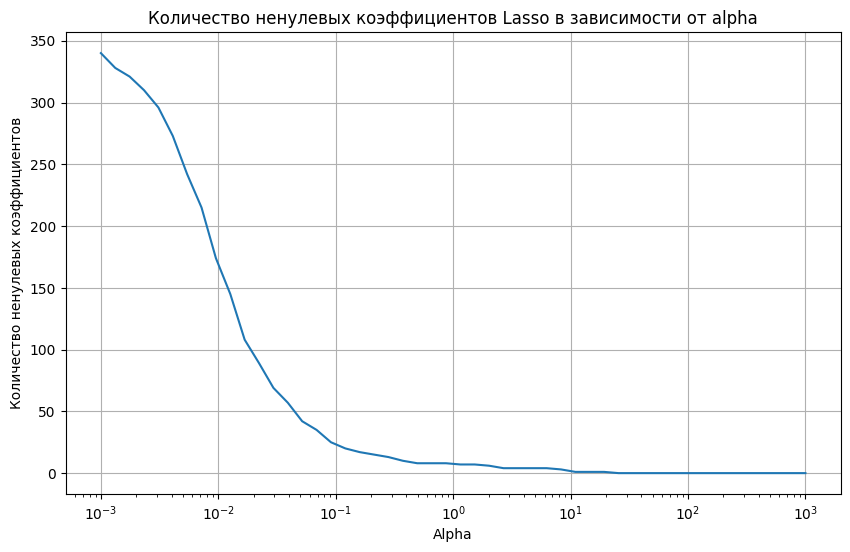

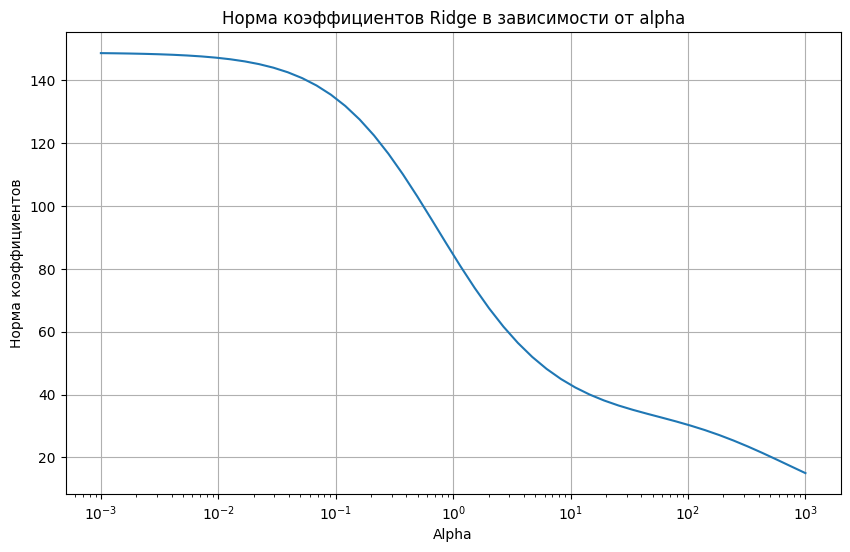

In [21]:
#18
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV, KFold

# Исследуем Lasso регрессию
alphas = np.logspace(-3, 3, 50)
lasso_nonzero_counts = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_1000, y_train_1000)
    nonzero_count = np.sum(np.abs(lasso.coef_) > 1e-6)  # считаем ненулевые коэффициенты
    lasso_nonzero_counts.append(nonzero_count)

# График для Lasso
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, lasso_nonzero_counts)
plt.title('Количество ненулевых коэффициентов Lasso в зависимости от alpha')
plt.xlabel('Alpha')
plt.ylabel('Количество ненулевых коэффициентов')
plt.grid(True)
plt.show()

# Исследуем Ridge регрессию
ridge_coef_norms = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_1000, y_train_1000)
    coef_norm = np.linalg.norm(ridge.coef_)  # норма коэффициентов
    ridge_coef_norms.append(coef_norm)

# График для Ridge
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_coef_norms)
plt.title('Норма коэффициентов Ridge в зависимости от alpha')
plt.xlabel('Alpha')
plt.ylabel('Норма коэффициентов')
plt.grid(True)
plt.show()

In [22]:
# Метрики для Ridge регрессии с alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_1000, y_train_1000)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Метрики для Ridge регрессии (alpha=1.0):")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}")

Метрики для Ridge регрессии (alpha=1.0):
RMSE: 10.44
MAE: 7.08
R²: 0.9185


In [23]:
# Подбор оптимального alpha для Ridge с помощью кросс-валидации
param_grid = {'alpha': np.logspace(-3, 3, 20)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Для MSE
ridge_cv_mse = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error')
ridge_cv_mse.fit(X_train_1000, y_train_1000)

# Для MAE
ridge_cv_mae = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_absolute_error')
ridge_cv_mae.fit(X_train_1000, y_train_1000)

# Для R²
ridge_cv_r2 = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='r2')
ridge_cv_r2.fit(X_train_1000, y_train_1000)

print("Лучшие параметры Ridge:")
print(f"Для MSE: alpha = {ridge_cv_mse.best_params_['alpha']:.4f}")
print(f"Для MAE: alpha = {ridge_cv_mae.best_params_['alpha']:.4f}")
print(f"Для R²: alpha = {ridge_cv_r2.best_params_['alpha']:.4f}")

# Оценка качества с лучшими параметрами
ridge_best = Ridge(alpha=ridge_cv_mse.best_params_['alpha'])
ridge_best.fit(X_train_1000, y_train_1000)
y_pred_ridge_best = ridge_best.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))
mae_best = mean_absolute_error(y_test, y_pred_ridge_best)
r2_best = r2_score(y_test, y_pred_ridge_best)

print("\nМетрики для Ridge с подобранным alpha:")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.4f}")

Лучшие параметры Ridge:
Для MSE: alpha = 6.1585
Для MAE: alpha = 12.7427
Для R²: alpha = 6.1585

Метрики для Ridge с подобранным alpha:
RMSE: 9.72
MAE: 6.56
R²: 0.9294


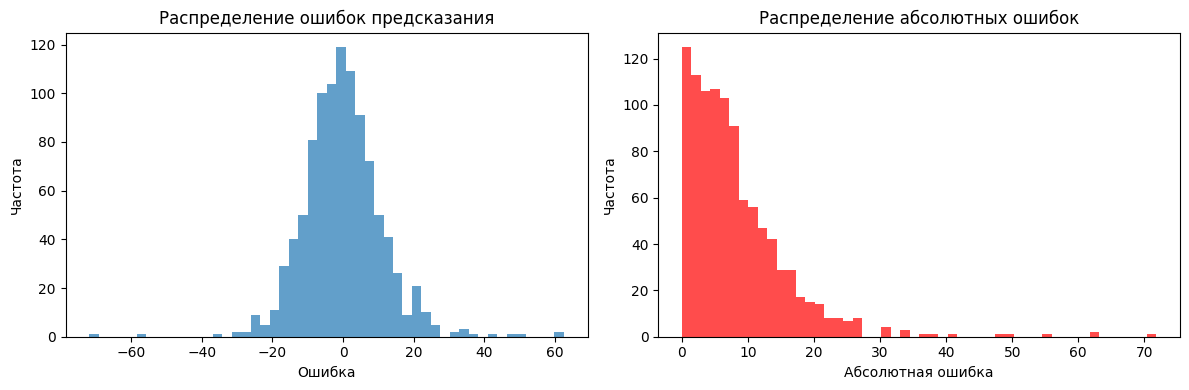

Статистики ошибок:
mean: -0.10
std: 11.12
min: -71.80
max: 62.49
q95: 21.42
q99: 34.07

Количество выбросов (ошибка > 21.42): 50
Доля выбросов: 0.050

Средняя задержка у выбросов: 31.44
Максимальная задержка у выбросов: 192.00


In [24]:
#19
from sklearn.model_selection import cross_val_predict

# Out-of-Fold предсказания для обучающей выборки
lr_oof = LinearRegression()
oof_predictions = cross_val_predict(lr_oof, X_train_1000, y_train_1000, cv=5)

# Ошибки предсказаний
errors = y_train_1000 - oof_predictions

# Анализ распределения ошибок
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, alpha=0.7)
plt.title('Распределение ошибок предсказания')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(np.abs(errors), bins=50, alpha=0.7, color='red')
plt.title('Распределение абсолютных ошибок')
plt.xlabel('Абсолютная ошибка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Статистики ошибок
error_stats = {
    'mean': np.mean(errors),
    'std': np.std(errors),
    'min': np.min(errors),
    'max': np.max(errors),
    'q95': np.percentile(np.abs(errors), 95),
    'q99': np.percentile(np.abs(errors), 99)
}

print("Статистики ошибок:")
for stat, value in error_stats.items():
    print(f"{stat}: {value:.2f}")

# Выявление выбросов
threshold = error_stats['q95']  # 95% квантиль абсолютных ошибок
outliers = np.abs(errors) > threshold

print(f"\nКоличество выбросов (ошибка > {threshold:.2f}): {np.sum(outliers)}")
print(f"Доля выбросов: {np.mean(outliers):.3f}")

# Анализ характеристик выбросов
if np.sum(outliers) > 0:
    outlier_indices = y_train_1000.index[outliers]
    print(f"\nСредняя задержка у выбросов: {y_train_1000[outliers].mean():.2f}")
    print(f"Максимальная задержка у выбросов: {y_train_1000[outliers].max():.2f}")

In [25]:
# Сравнение всех обученных моделей
models = {
    'Linear Regression': lr,
    'Ridge (alpha=1.0)': ridge,
    'Ridge (optimized)': ridge_best
}

print("Сравнение моделей на тестовой выборке:")
print("=" * 50)

for name, model in models.items():
    if name == 'Linear Regression':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.4f}")

Сравнение моделей на тестовой выборке:

Linear Regression:
  RMSE: 13.00
  MAE: 7.94
  R²: 0.8738

Ridge (alpha=1.0):
  RMSE: 10.44
  MAE: 7.08
  R²: 0.9185

Ridge (optimized):
  RMSE: 9.72
  MAE: 6.56
  R²: 0.9294
